<a href="https://colab.research.google.com/github/SanskritiKushik5/NNDL/blob/main/Churn_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/content/Churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7354,7355,15757933,Hardy,733,Germany,Female,30,1,102452.71,1,1,0,21556.95,0
9662,9663,15660611,Gallo,748,Spain,Male,39,3,0.00,2,1,1,123998.52,0
4781,4782,15804131,Farmer,850,Spain,Female,53,7,65407.16,2,0,0,182633.63,1
3237,3238,15665760,Kazantsev,802,Spain,Male,38,7,0.00,2,0,1,57764.65,0
3330,3331,15657439,Chao,738,France,Male,18,4,0.00,2,1,1,47799.15,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [6]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5695,787,France,Male,46,7,117685.31,2,1,1,93360.35,0
3030,676,France,Male,20,1,80569.73,1,0,0,68621.98,0
1852,698,Spain,Male,38,10,95010.92,1,1,1,105227.86,0
2416,850,France,Male,46,9,117640.39,1,1,0,88920.68,0
7536,697,France,Female,42,1,0.00,1,1,0,1262.83,1


In [7]:
df['Geography'].nunique()

3

In [8]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1824,798,France,1,37,4,111723.08,1,1,1,83478.12,0
8873,610,France,0,34,0,103108.17,1,0,0,125646.82,0
2883,559,France,1,38,8,95139.41,1,1,1,86575.46,0
3492,655,France,1,45,7,57327.04,1,0,1,47349.00,0
1199,645,France,0,41,7,0.00,1,0,1,28667.56,0
6514,563,Spain,0,26,7,0.00,2,0,0,6139.74,0
6202,690,Spain,0,49,8,116622.73,1,0,1,51011.29,0
206,608,Spain,1,41,3,89763.84,1,0,0,199304.74,1
4311,727,Spain,1,52,1,154733.97,1,1,0,80259.67,1
6755,812,Spain,0,38,3,127117.80,2,1,1,174822.74,0


In [16]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,0,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,0,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [17]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [18]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8329,683,0,43,2,112499.42,2,1,0,30375.18,0,1,0,0
5044,562,0,30,3,111099.79,2,0,0,140650.19,0,1,0,0
2259,686,1,41,4,129553.76,2,1,0,187599.80,0,1,0,0
5985,705,0,33,7,68423.89,1,1,1,64872.55,0,0,0,1
8036,555,0,21,1,0.00,2,0,0,103901.35,0,0,0,1
1375,429,1,27,6,117307.44,2,1,1,24020.49,0,1,0,0
29,411,0,29,0,59697.17,2,1,1,53483.21,0,1,0,0
332,663,0,44,2,117028.60,2,0,1,144680.18,0,0,1,0
2209,663,0,33,9,0.00,2,0,0,91514.62,0,0,0,1
8833,594,0,50,7,81310.34,1,1,1,183868.01,0,1,0,0


In [19]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


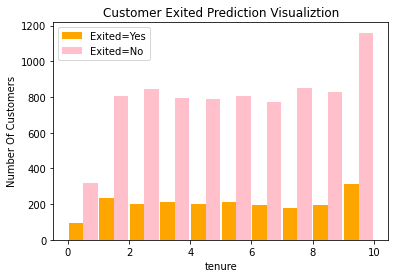

In [23]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


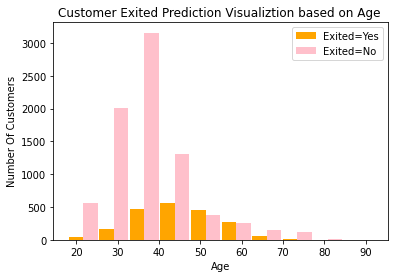

In [24]:
exited_no = df1[df1.Exited==0].Age
exited_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


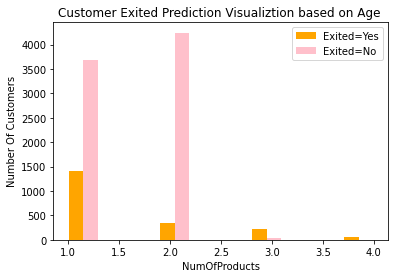

In [25]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [26]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [27]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5439,0.726,1,0.581081,0.4,0.595960,0.333333,1,0,0.618319,0,0,1,0
1467,0.548,1,0.229730,0.0,0.718631,0.333333,1,0,0.817960,0,0,1,0
7266,0.824,1,0.567568,1.0,0.673264,0.000000,1,0,0.157182,1,0,0,1
2766,0.710,0,0.162162,0.1,0.000000,0.000000,1,1,0.906530,0,1,0,0
6450,0.968,1,0.135135,0.6,0.000000,0.000000,1,0,0.371415,0,1,0,0
5443,0.702,0,0.135135,0.1,0.412204,0.000000,0,1,0.381502,0,0,0,1
98,0.720,0,0.054054,0.8,0.000000,0.333333,0,0,0.498215,0,0,0,1
7894,0.712,0,0.662162,0.1,0.491342,0.333333,1,1,0.432523,1,0,1,0
8944,0.402,0,0.418919,0.1,0.600952,0.333333,1,1,0.678793,0,0,0,1
8577,0.808,0,0.635135,0.1,0.542796,0.000000,1,1,0.607648,1,0,1,0


In [28]:
df1.shape

(10000, 13)

In [29]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [30]:
X_train.shape

(8000, 12)

In [31]:
X_test.shape

(2000, 12)

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7943
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7976
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4511 - accuracy: 0.8045
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.8106
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8152
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8185
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8256
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.8306
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8354
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3766 - accura

In [33]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8560


[0.3445571959018707, 0.8560000061988831]

In [34]:
yp = model.predict(X_test)
yp[:5]

array([[0.0378488 ],
       [0.06893215],
       [0.07064125],
       [0.06970513],
       [0.04653433]], dtype=float32)

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

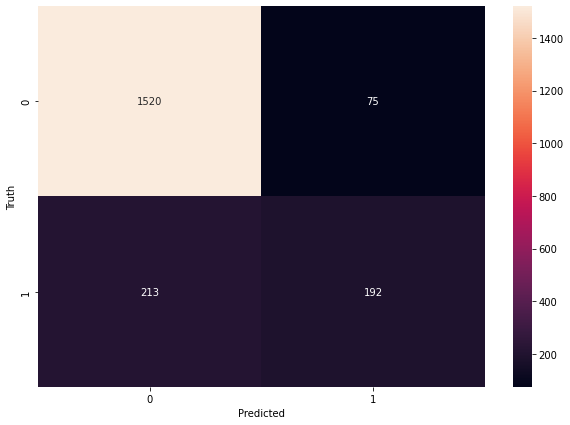

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
round((1520+192)/(1520+192+75+213),2)

0.86

Precision for customers who did not churn

In [42]:
round(1520/(1520+192),2)

0.89

Precision for customers who actually churned

In [43]:
round(192/(192+75),2)

0.72

In [44]:
round(1520/(1520+75),2)

0.95

In [45]:
round(192/(213+192),2)

0.47